## Q1. we have (.6, .1) inputs ---> 1 is output [using Gradients descent]

In [ ]:
import numpy as np

# Inputs
x1, x2 = 0.6, 0.1
y = 1

# Parameters
w1, w2, b = 0.2, -0.3, 0.4
lr = 40 # <- Here lr changes to 0.1 -> 40

# Sigmoid
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Forward pass
z = w1*x1 + w2*x2 + b
y_pred = sigmoid(z)

# Loss derivative
dL_dy_pred = y_pred - y

# Sigmoid derivative
dy_pred_dz = y_pred*(1-y_pred)

# Chain rule
dL_dz = dL_dy_pred * dy_pred_dz

# Gradients
dL_dw1 = dL_dz * x1
dL_dw2 = dL_dz * x2
dL_db = dL_dz

# Update
w1 -= lr*dL_dw1
w2 -= lr*dL_dw2
b  -= lr*dL_db

print(w1, w2, b)


2.3478371918140564 0.0579728653023428 3.9797286530234275


In [ ]:
# Checking the output of network
z = w1*x1 + w2*x2 + b
y_pred = sigmoid(z)
print("Y_pred :",y_pred,"\ny_pred :",round(y_pred,2),"(round off)")

Y_pred : 0.9954778181547705 
y_pred : 1.0 (round off)


---
## AND Gate [using Gradients descent]





In [ ]:
import numpy as np

# AND data
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y = np.array([0,0,0,1])

# Parameters
w = np.array([0.1, 0.2])
b = 0.3
lr = 40

def sigmoid(z):
    return 1/(1+np.exp(-z))

# Training
for epoch in range(1000):
    for i in range(len(X)):
        z = np.dot(X[i], w) + b
        y_pred = sigmoid(z)

        # BCE + Sigmoid gradient shortcut
        dz = y_pred - y[i]
        dw = dz * X[i]
        db = dz
        w -= lr * dw
        b -= lr * db

print("Weights:", w)
print("Bias:", b)


Weights: [80.10087994 40.20088695]
Bias: -102.67681660713373


In [ ]:
# Output of network for AND Gate
res = sigmoid(np.dot(X, w) + b)
print(res)
rounded_list_dec = [round(x.item(), 2) for x in res] # <- here item() remove np.float vala seen
print(rounded_list_dec) # <- just round off values

[2.55873393e-45 7.36289319e-28 1.56817773e-10 9.99999978e-01]
[0.0, 0.0, 0.0, 1.0]


---
## OR Gate [using Gradients descent]

In [ ]:
import numpy as np

# OR data
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y = np.array([0,1,1,1])

# Parameters
w = np.array([0.1, 0.2])
b = 0.3
lr = 40

def sigmoid(z):
    return 1/(1+np.exp(-z))

def loss(yog, yp): return ((yp-yog)**2) * .5

loss_li = []
# Training
for epoch in range(1000):
    for i in range(len(X)):
        z = np.dot(X[i], w) + b
        y_pred = sigmoid(z)

        # BCE + Sigmoid gradient shortcut
        dz = y_pred - y[i] # hen paired with a sigmoid output, it simplifies significantly, directly driving weight updates based on the error (y-y).
        dw = dz * X[i]
        db = dz
        w -= lr * dw
        b -= lr * db

print("Weights:", w)
print("Bias:", b)


Weights: [40.10108276 40.20097977]
Bias: -22.67564139778767


In [ ]:
# Output of network for OR Gate
res2 = np.dot(X, w) + b
res2 = sigmoid(res2)
print(res2)
round_list = [round(x.item(), 2) for x in res2] # <- here item() remove np.float vala seen
print(round_list)

[1.41936492e-10 9.99999976e-01 9.99999973e-01 1.00000000e+00]
[0.0, 1.0, 1.0, 1.0]


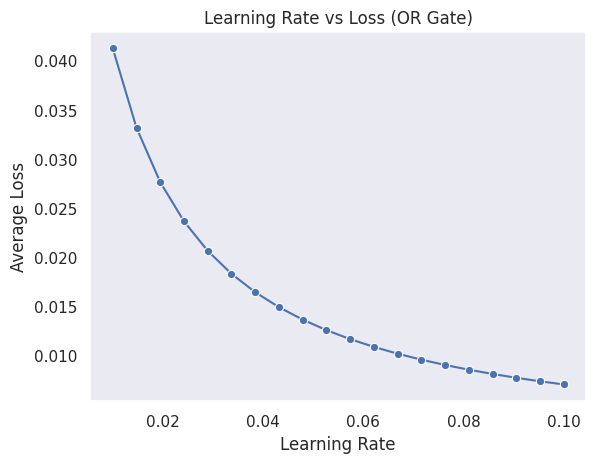

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# OR data
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y = np.array([0,1,1,1])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(y_true, y_pred):
    return 0.5 * (y_pred - y_true) ** 2

# learning rates from 0.01 to 0.1
lr_list = np.linspace(0.01, 0.1, 20)
loss_li = []

for lr in lr_list:
    # reinitialize parameters for each LR
    w = np.array([0.1, 0.2])
    b = 0.3

    total_loss = 0

    for epoch in range(1000):
        for i in range(len(X)):
            z = np.dot(X[i], w) + b
            y_pred = sigmoid(z)

            # loss
            total_loss += loss(y[i], y_pred)

            # gradient (sigmoid + BCE style)
            dz = y_pred - y[i]
            dw = dz * X[i]
            db = dz

            w -= lr * dw
            b -= lr * db

    # average loss
    loss_li.append(total_loss / (1000 * len(X)))

# Plot
sns.set(style="darkgrid")
sns.lineplot(x=lr_list, y=loss_li, marker="o")
plt.xlabel("Learning Rate")
plt.ylabel("Average Loss")
plt.title("Learning Rate vs Loss (OR Gate)")
plt.grid(False)
plt.show()
